In [1]:
import numpy as np
import geopandas as gpd
import shapely

In [2]:
data = gpd.read_file("data/nhgis0001_shape/1940_shapefiles/US_tract_1940.shp")
data10 = gpd.read_file("data/nhgis0001_shape/2010_shapefiles/US_tract_2010.shp")

In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

- NHGISST - State FIPS Code
- NHGISCTY - County FIPS Code
- GISJOIN2 - Tract ID

In [6]:
data.head()

,NHGISST,NHGISCTY,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
0,550,0790,G55007900090,55007900090,1.902826e+06,9640.965368,"POLYGON ((650791.784 654746.221, 650886.198 65..."
1,550,0790,G55007900094,55007900094,4.469542e+06,12723.051874,"POLYGON ((646759.565 651779.856, 646851.837 65..."
2,550,0790,G55007900106,55007900106,1.922867e+06,9018.734789,"POLYGON ((645601.102 647368.017, 645603.998 64..."
3,550,0790,G55007900120,55007900120,5.911788e+05,3910.293426,"POLYGON ((651610.978 645287.406, 651627.984 64..."
4,550,0790,G55007900121,55007900121,5.986344e+05,3298.722875,"POLYGON ((651663.884 644664.080, 651672.815 64..."


In [7]:
codes = np.unique(data.NHGISST.values)
codes

array(['010', '060', '080', '090', '110', '130', '155', '170', '180',
       '190', '210', '220', '240', '250', '260', '270', '290', '340',
       '360', '390', '400', '410', '420', '440', '450', '470', '480',
       '510', '530', '550'], dtype=object)

In [12]:
# import matplotlib
import descartes
%matplotlib inline
print(np.unique(data[data.NHGISST == codes[14]].NHGISCTY.values))
data[data.NHGISST == '060']

['0490' '0990' '1250' '1630']


,NHGISST,NHGISCTY,GISJOIN,GISJOIN2,SHAPE_AREA,SHAPE_LEN,geometry
3908,060,0370,G06003700034,06003700034,3.057989e+06,10525.801582,"POLYGON ((-2015302.692 -139376.336, -2015297.8..."
3909,060,0370,G06003700033,06003700033,4.212021e+06,11274.264323,"POLYGON ((-2014323.255 -138977.584, -2014260.9..."
3984,060,0750,G0600750N0012,0600750N0012,7.223087e+05,4205.906508,"POLYGON ((-2276629.252 346697.116, -2276645.47..."
3990,060,0750,G0600750O0001,0600750O0001,2.631887e+06,8014.334206,"POLYGON ((-2278293.841 347860.183, -2278165.19..."
4003,060,0370,G06003700030,06003700030,1.059832e+07,20186.884971,"POLYGON ((-2023691.750 -136086.644, -2023603.1..."
...,...,...,...,...,...,...,...
7460,060,0370,G06003700173,06003700173,4.534233e+05,3082.399958,"POLYGON ((-2021503.417 -148734.166, -2021543.4..."
7461,060,0370,G06003700174,06003700174,4.089571e+05,3008.494536,"POLYGON ((-2022467.651 -148181.111, -2022602.7..."
7462,060,0370,G06003700175,06003700175,4.194136e+05,2884.431226,"POLYGON ((-2021661.133 -148867.616, -2021806.6..."
7463,060,0370,G06003700176,06003700176,3.261174e+05,2585.063468,"POLYGON ((-2022837.706 -148622.932, -2022837.6..."


In [9]:
print(data[data.NHGISCTY == codes[16]].GISJOIN2)
codes[16]

Series([], Name: GISJOIN2, dtype: object)


'290'

Manually verify that the tract crosswalk matches up:

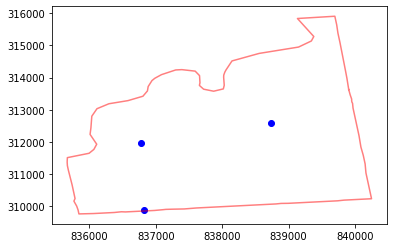

In [8]:
import matplotlib.pyplot as plt

polygon = data[data.GISJOIN2 == '18009700136'].geometry.values[0]
polygon10 = data10[data10.GEOID10 == "18097320301"].geometry.values[0].centroid
polygon10_2 = data10[data10.GEOID10 == "18097320304"].geometry.values[0].centroid
polygon10_3 = data10[data10.GEOID10 == "18097320500"].geometry.values[0].centroid

x, y = polygon.exterior.xy
x10, y10 = polygon10.x, polygon10.y
x10_2, y10_2 = polygon10_2.x, polygon10_2.y
x10_3, y10_3 = polygon10_3.x, polygon10_3.y
fig, ax = plt.subplots()
ax.plot(x, y, c='r', alpha=0.5)
ax.scatter(x10, y10, c='blue')
ax.scatter(x10_2, y10_2, c='blue')
ax.scatter(x10_3, y10_3, c='blue')